# Example Usage of the Data Tables

We provide four example datasets in the `./data/` folder:
- PhotoPhillic_TRH=100MeV.csv
- PhotoPhillic_TRH=5MeV.csv
- PhotoPhobic_TRH=5MeV.csv
- PhotoPhobic_TRH=100MeV.csv

In particular, these are the abundances for the photophilic ($g_{aee}=0$) and photophobic ($g_{a\gamma\gamma}=0$) for two reheat temperatures, the minimal 5 MeV, and a further result from 100 MeV.

All files contain an array of masses [keV], gagg values [1/GeV], and Fa or fractional DM abundance values. Below we demonstrate how to use these by showing how to reproduce both panels of Fig. S2 in our paper (for the total abundance), including the analogue at 100 MeV

In [1]:
from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import numpy and pandas
import numpy as np
import pandas as pd

# Plotting defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['lines.dashed_pattern'] = 4.8, 3.5
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['legend.frameon'] = False

# Photophilic Abundance

Here we show the left side of Fig. S2, for two reheat temperatures.

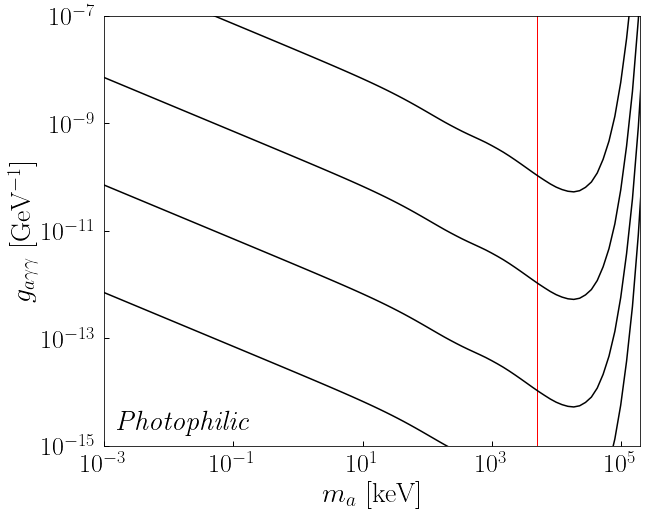

In [2]:
case = 'Phillic'
TRH = 5 # MeV

df = pd.read_csv('./data/Photo'+case+'_TRH='+str(TRH)+'MeV.csv', sep=',', header=None)
ma = np.array(df[0].values) # ma in [keV]
ga = np.array(df[1].values) # gagg in [GeV^-1]
Fa = np.array(df[2].values) # Fa - fraction of DM

muniq = np.unique(ma)

# Determine DM fractions to consider
Fafracs = np.array([1., 1.e-4, 1.e-8, 1.e-12])

mg_F = np.zeros((len(muniq),len(Fafracs)))
for i, mi in enumerate(muniq):
    totloc = np.where(ma == mi)
    gK = ga[totloc]
    FK = Fa[totloc]
    
    for j, Faj in enumerate(Fafracs):
        # Log interpolate|
        mg_F[i,j] = np.exp(np.interp(np.log(Faj), np.log(FK), np.log(gK)))

fig, ax = plt.subplots(1, figsize=(10./1.1, 8./1.1))

for j in range(len(Fafracs)):
    plt.plot(muniq, mg_F[:,j],c='black',zorder=4,lw=1.5)

plt.axvline(TRH*1.e3,zorder=1,lw=1.,color='red')
    
plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-3,2.e5])
plt.ylim([1.e-15,1.e-7])

plt.text(1.5e-3,2.e-15,r'{\it Photophilic}',fontsize=28,bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1',alpha=0.95,zorder=4))
plt.xlabel(r"$m_a$ [keV]",fontsize=28)
plt.ylabel(r"$g_{a\gamma\gamma}$ [GeV$^{-1}$]",fontsize=28)

plt.tight_layout()
plt.show()

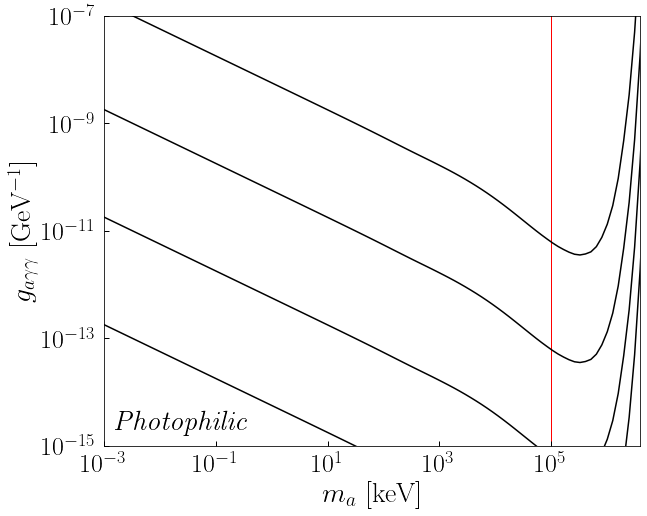

In [3]:
case = 'Phillic'
TRH = 100 # MeV

df = pd.read_csv('./data/Photo'+case+'_TRH='+str(TRH)+'MeV.csv', sep=',', header=None)
ma = np.array(df[0].values) # ma in [keV]
ga = np.array(df[1].values) # gagg in [GeV^-1]
Fa = np.array(df[2].values) # Fa - fraction of DM

muniq = np.unique(ma)

# Determine DM fractions to consider
Fafracs = np.array([1., 1.e-4, 1.e-8, 1.e-12])

mg_F = np.zeros((len(muniq),len(Fafracs)))
for i, mi in enumerate(muniq):
    totloc = np.where(ma == mi)
    gK = ga[totloc]
    FK = Fa[totloc]
    
    for j, Faj in enumerate(Fafracs):
        # Log interpolate|
        mg_F[i,j] = np.exp(np.interp(np.log(Faj), np.log(FK), np.log(gK)))

fig, ax = plt.subplots(1, figsize=(10./1.1, 8./1.1))

for j in range(len(Fafracs)):
    plt.plot(muniq, mg_F[:,j],c='black',zorder=4,lw=1.5)

plt.axvline(TRH*1.e3,zorder=1,lw=1.,color='red')
    
plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-3,4.e6])
plt.ylim([1.e-15,1.e-7])

plt.text(1.5e-3,2.e-15,r'{\it Photophilic}',fontsize=28,bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1',alpha=0.95,zorder=4))
plt.xlabel(r"$m_a$ [keV]",fontsize=28)
plt.ylabel(r"$g_{a\gamma\gamma}$ [GeV$^{-1}$]",fontsize=28)

plt.tight_layout()
plt.show()

# Photophobic Abundance

Here we show the right side of Fig. S2, for two reheat temperatures.

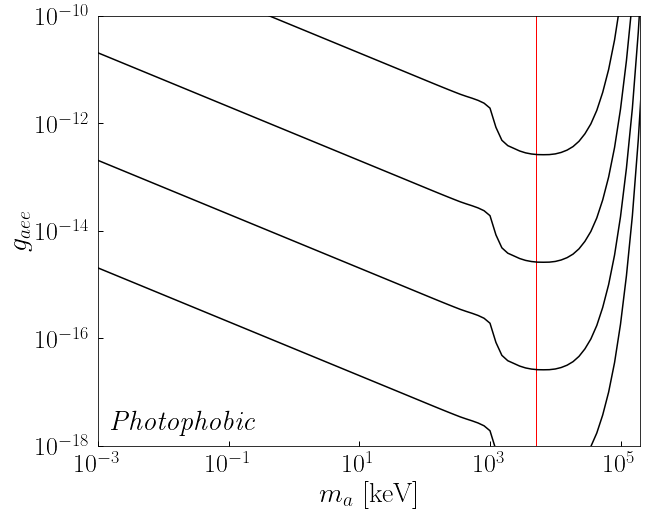

In [4]:
case = 'Phobic'
TRH = 5 # MeV

df = pd.read_csv('./data/Photo'+case+'_TRH='+str(TRH)+'MeV.csv', sep=',', header=None)
ma = np.array(df[0].values) # ma in [keV]
ga = np.array(df[1].values) # gagg in [GeV^-1]
Fa = np.array(df[2].values) # Fa - fraction of DM

muniq = np.unique(ma)

# Determine DM fractions to consider
Fafracs = np.array([1., 1.e-4, 1.e-8, 1.e-12])

mg_F = np.zeros((len(muniq),len(Fafracs)))
for i, mi in enumerate(muniq):
    totloc = np.where(ma == mi)
    gK = ga[totloc]
    FK = Fa[totloc]
    
    for j, Faj in enumerate(Fafracs):
        # Log interpolate|
        mg_F[i,j] = np.exp(np.interp(np.log(Faj), np.log(FK), np.log(gK)))

fig, ax = plt.subplots(1, figsize=(10./1.1, 8./1.1))

for j in range(len(Fafracs)):
    plt.plot(muniq, mg_F[:,j],c='black',zorder=4,lw=1.5)

plt.axvline(TRH*1.e3,zorder=1,lw=1.,color='red')
    
plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-3,2.e5])
plt.ylim([1.e-18,1.e-10])

plt.text(1.5e-3,2.e-18,r'{\it Photophobic}',fontsize=28,bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1',alpha=0.95,zorder=4))
plt.xlabel(r"$m_a$ [keV]",fontsize=28)
plt.ylabel(r"$g_{aee}$",fontsize=28)

plt.tight_layout()
plt.show()

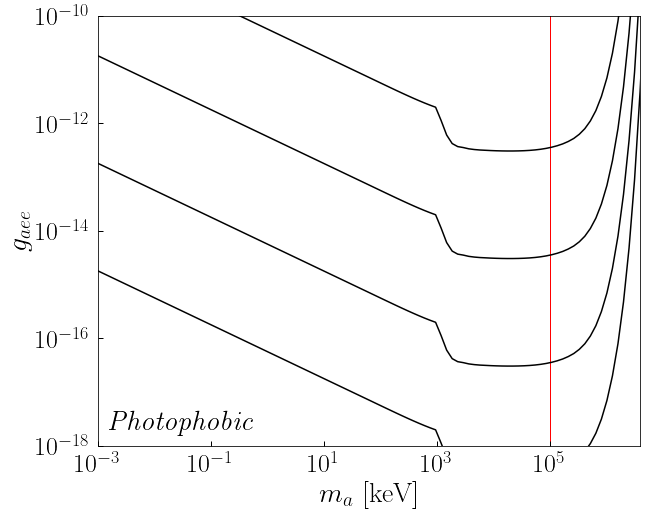

In [5]:
case = 'Phobic'
TRH = 100 # MeV

df = pd.read_csv('./data/Photo'+case+'_TRH='+str(TRH)+'MeV.csv', sep=',', header=None)
ma = np.array(df[0].values) # ma in [keV]
ga = np.array(df[1].values) # gagg in [GeV^-1]
Fa = np.array(df[2].values) # Fa - fraction of DM

muniq = np.unique(ma)

# Determine DM fractions to consider
Fafracs = np.array([1., 1.e-4, 1.e-8, 1.e-12])

mg_F = np.zeros((len(muniq),len(Fafracs)))
for i, mi in enumerate(muniq):
    totloc = np.where(ma == mi)
    gK = ga[totloc]
    FK = Fa[totloc]
    
    for j, Faj in enumerate(Fafracs):
        # Log interpolate|
        mg_F[i,j] = np.exp(np.interp(np.log(Faj), np.log(FK), np.log(gK)))

fig, ax = plt.subplots(1, figsize=(10./1.1, 8./1.1))

for j in range(len(Fafracs)):
    plt.plot(muniq, mg_F[:,j],c='black',zorder=4,lw=1.5)

plt.axvline(TRH*1.e3,zorder=1,lw=1.,color='red')
    
plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-3,4.e6])
plt.ylim([1.e-18,1.e-10])

plt.text(1.5e-3,2.e-18,r'{\it Photophobic}',fontsize=28,bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1',alpha=0.95,zorder=4))
plt.xlabel(r"$m_a$ [keV]",fontsize=28)
plt.ylabel(r"$g_{aee}$",fontsize=28)

plt.tight_layout()
plt.show()